Scope:

This project aims to look into ways of characterizing a behavioural process with tools and parameters used in information theory.  
This can give more insight into the nature of the process and can in turn be used to create models trying to explain behaviour following similar processes.

total transient information: 3.9808937465117435


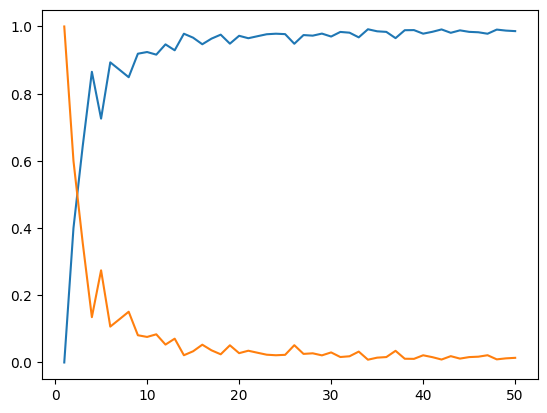

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def usfreq(s): # calculate frequency of each unique sample value in order of appearance
    ucount = np.unique(s, return_counts = True)[1]
    return(ucount)


## testing average entropy convergence  with sample length for fair coin flip
L = 50 # max length of measurements
N = 20 # number of repetitions to average over
H = np.zeros(L)
for l in range(1, L):
    for n in range(N):
        s = np.random.binomial(1, 0.5, l+1)
        H[l] += 1/N * sp.stats.entropy(usfreq(s), base = 2)

plt.plot(np.arange(1, L+1, 1), H)


# excess entropy
t_ent = 1 # true entropy of fair coin flip
ex_ent = t_ent + 0 # no entropy rate => excess entropy = true entropy
T = 1 - H
plt.plot(np.arange(1, L+1, 1), T)
print("total transient information:", np.sum(T))


Observing the delayed action MDP

The problem, which will be looked at in more detail, is a so-called "delayed action" experiment. One can picture an agent in a box, with a light switch, the light itself and a hatch through which a reward is given.
This setup can be described with the following Markov Decision Process (MDP), where $P_{ai}, P_{wi}, i = {0, 1, 2}$ denote the agent's policy to act or wait in a given state and $p_X$ is the base probability for the light to turn on when currently switched off.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pygraphviz
import os
import pickle
#from network_viz_functions import create_lower_diGraph, create_upper_diGraph
#os.environ["R_HOME"] = "C:\\Users\\alexa\\anaconda3\\envs\\PS\\Lib\\R"
#import rpy2.robjects as ro
#%load_ext rpy2.ipython

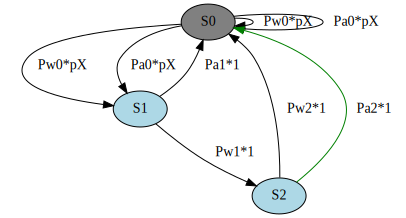

In [91]:
da_graph = nx.MultiDiGraph()
da_graph.add_nodes_from([("S0", {"fillcolor": "grey", "subset":0}), ("S1", {"fillcolor": "lightblue", "subset":0}), ("S2", {"fillcolor": "lightblue", "subset":0})])
edges = [("S0", "S1", "Pw0", {"p":"pX"}),
         ("S0", "S0", "Pw0", {"p":"pX"}),
         ("S0", "S1", "Pa0", {"p":"pX"}),
         ("S0", "S0", "Pa0", {"p":"pX"}),
         ("S1", "S2", "Pw1", {"p":1}),
         ("S1", "S0", "Pa1", {"p":1}),
         ("S2", "S0", "Pw2", {"p":1}),
         ("S2", "S0", "Pa2", {"p":1, "color": "green"})]
da_graph.add_edges_from(edges)
labels = {(edge[0], edge[1], edge[2]):str(edge[2] + "*" + str(edge[3]["p"]) + "   ") for edge in da_graph.edges(data = True, keys = True)}
nx.set_edge_attributes(da_graph, labels, "label")

D = nx.drawing.nx_agraph.to_agraph(da_graph)
D.node_attr.update(style = "filled")
D.layout('dot')

D

The agent now moves through the states according to its policy, but what is the result of this?
If there is an observer, who can only observe the state of the light itself, so on or off, this observer will see a two state Markov Process (MP) with the following transition probabilities.

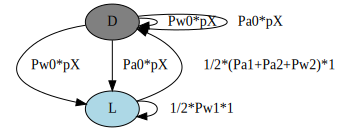

In [92]:
da_graph_light = nx.MultiDiGraph()
da_graph_light.add_nodes_from([("D", {"fillcolor": "grey", "subset":0}), ("L", {"fillcolor": "lightblue", "subset":0})])
edges = [("D", "L", "Pw0", {"p":"pX"}),
         ("D", "D", "Pw0", {"p":"pX"}),
         ("D", "L", "Pa0", {"p":"pX"}),
         ("D", "D", "Pa0", {"p":"pX"}),
         ("L", "D", "1/2*(Pa1+Pa2+Pw2)", {"p":1}),
         ("L", "L", "1/2*Pw1", {"p":1})]
da_graph_light.add_edges_from(edges)
labels = {(edge[0], edge[1], edge[2]):str(edge[2] + "*" + str(edge[3]["p"]) + "   ") for edge in da_graph_light.edges(data = True, keys = True)}
nx.set_edge_attributes(da_graph_light, labels, "label")

D = nx.drawing.nx_agraph.to_agraph(da_graph_light)
D.node_attr.update(style = "filled")
D.layout('dot')

D

One can now calculate the probability to observe a light- or dark-state and simplify to get the following results:

$$
P_D = \frac{1}{2} [p_X(P_{a0}+P_{w0}) + \frac{1}{2} (P_{a1}+P_{a2}+P_{w2})] =
      \frac{1}{2} [p_X(P_{a0}+(1-P_{a0})) + \frac{1}{2} (P_{a1}+P_{a2}+(1-P_{a2}))] = \frac{2 p_X + 1 + P_{a1}}{4}, \\
$$   
$$     
P_L = \frac{1}{2} [p_X(P_{a0}+(1-P_{a0})) + \frac{1}{2} (1-P_{a1})] = \frac{2 p_X + 1 - P_{a1}}{4}
$$

Only looking at the actions of the agent also results in a two state MP, with rather trivial transition probabilities:
$$
P_A = \frac{P_{a0}+P_{a1}+P_{a2}}{3}, P_W = 1- P_A
$$

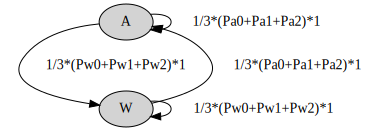

In [88]:
da_graph_action = nx.MultiDiGraph()
da_graph_action.add_nodes_from([("A", {"subset":0}), ("W", {"subset":0})])
edges = [("A", "A", "1/3*(Pa0+Pa1+Pa2)", {"p":1}),
         ("A", "W", "1/3*(Pw0+Pw1+Pw2)", {"p":1}),
         ("W", "A", "1/3*(Pa0+Pa1+Pa2)", {"p":1}),
         ("W", "W", "1/3*(Pw0+Pw1+Pw2)", {"p":1})]
da_graph_action.add_edges_from(edges)
labels = {(edge[0], edge[1], edge[2]):str(edge[2] + "*" + str(edge[3]["p"]) + "   ") for edge in da_graph_action.edges(data = True, keys = True)}
nx.set_edge_attributes(da_graph_action, labels, "label")

D = nx.drawing.nx_agraph.to_agraph(da_graph_action)
D.node_attr.update(style = "filled")
D.layout('dot')

D

One can now also think about combining the two observations, so for example the observer allways gets the information about the current state of the light and the action of the agent that brought it to that state.
This will now result in a MP with four states.

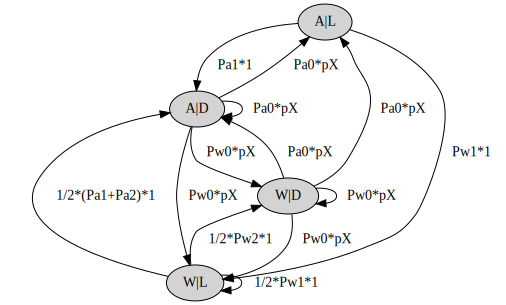

In [90]:
da_graph_combined = nx.MultiDiGraph()
da_graph_combined.add_nodes_from([("A|L", {"subset":0}), ("A|D", {"subset":0}), ("W|L", {"subset":0}), ("W|D", {"subset":0})])
edges = [#("A|L", "A|L", "0", {"p":1}),
         ("A|L", "A|D", "Pa1", {"p":1}),
         ("A|L", "W|L", "Pw1", {"p":1}),
         #("A|L", "W|D", "0", {"p":1}),
         ("A|D", "A|L", "Pa0", {"p":"pX"}),
         ("A|D", "A|D", "Pa0", {"p":"pX"}),
         ("A|D", "W|L", "Pw0", {"p":"pX"}),
         ("A|D", "W|D", "Pw0", {"p":"pX"}),
         #("W|L", "A|L", "0", {"p":1}),
         ("W|L", "A|D", "1/2*(Pa1+Pa2)", {"p":1}),
         ("W|L", "W|L", "1/2*Pw1", {"p":1}),
         ("W|L", "W|D", "1/2*Pw2", {"p":1}),
         ("W|D", "A|L", "Pa0", {"p":"pX"}),
         ("W|D", "A|D", "Pa0", {"p":"pX"}),
         ("W|D", "W|L", "Pw0", {"p":"pX"}),
         ("W|D", "W|D", "Pw0", {"p":"pX"})]
da_graph_combined.add_edges_from(edges)
labels = {(edge[0], edge[1], edge[2]):str(edge[2] + "*" + str(edge[3]["p"]) + "   ") for edge in da_graph_combined.edges(data = True, keys = True)}
nx.set_edge_attributes(da_graph_combined, labels, "label")

D = nx.drawing.nx_agraph.to_agraph(da_graph_combined)
D.node_attr.update(style = "filled")
D.layout('dot')

D

The probabilities for each state are then as follows:
$$
P_{A|L} = \frac{1}{4}(p_X P_{a0} + p_X P_{a0}) = \frac{p_X P_{a0}}{2},
$$
$$ 
P_{W|L} = \frac{1}{4}[p_X(1-P_{a0}) + (1-P_{a1}) + \frac{1}{2} (1-P_{a1}) + p_X(1-P_{a0})] = \frac{4p_X + 3 - (4p_X P_{a0} + 3P_{a1})}{8},
$$
$$
P_{A|D} = \frac{1}{4}[p_X P_{a0} + P_{a1} + p_X P_{a0} + \frac{1}{2}(P_{a1} + P_{a2})] = \frac{4p_X P_{a0} + 3P_{a1} + P_{a2}}{8}
$$
$$
P_{W|D} = \frac{1}{4}[p_X(1-P_{a0}) + \frac{1}{2}(1-P_{a2}) + p_X(1-P_{a0})] = \frac{4p_X + 1 - (4p_X P_{a0} + P_{a2})}{8}
$$